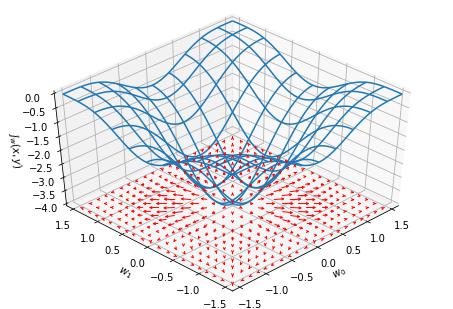

In [9]:
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline 

# Thanks to CT Zhu. See the link as follows
# http://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot

# https://commons.wikimedia.org/wiki/File:Gradient_Visual.svg

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# draw the frames
ax = Axes3D(figure(), azim = -135, elev = 45)
X = arange(-pi/2, pi/2, pi/100)	# set ranges
Y = arange(-pi/2, pi/2, pi/100)
X, Y = meshgrid(X, Y)
Z = -(cos(X)**2+cos(Y)**2)**2	# give the function
ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10)
ax.set_xlabel("$w_0$")
ax.set_ylabel("$w_1$")
ax.set_zlabel('$J_w(x,y)$')
ax.set_xlim([-pi/2,pi/2])
ax.set_ylim([-pi/2,pi/2])
ax.set_zlim([-4,0])

# draw the contoured quiver
X1 = arange(-pi/2, pi/2, pi/20)	# start of the arrows
Y1 = arange(-pi/2, pi/2, pi/20)
for x in X1:
	for y in Y1:
		ax.add_artist(Arrow3D([x,x+4*sin(x)*cos(x)*(cos(x)**2+cos(y)**2)*0.06],\
		[y,y+4*sin(y)*cos(y)*(cos(x)**2+cos(y)**2)*0.06],\
		[-3.9999,-4.0000],lw=1, mutation_scale=5,arrowstyle="->", color="r"))
#plt.figure(figsize=(60,20))
plt.savefig("gradient_vis_sin.pdf")

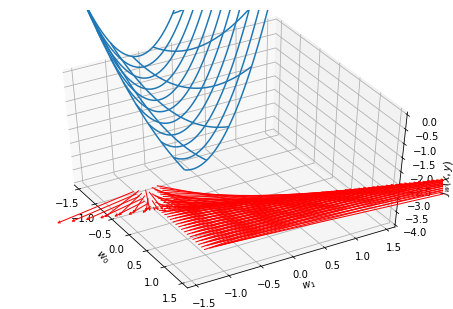

In [25]:
# draw the frames
ax = Axes3D(figure(), azim = -30, elev = 45)
X = arange(-pi/2, pi/2, pi/100)	# set ranges
Y = arange(-pi/2, pi/2, pi/100)
X, Y = meshgrid(X, Y)
Z = ( ((Y + 0.8*X) - 1) +  ((Y - 0.2*X) + 3))**2	# give the function
ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10)
ax.set_xlabel("$w_0$")
ax.set_ylabel("$w_1$")
ax.set_zlabel('$J_w(x,y)$')
ax.set_xlim([-pi/2,pi/2])
ax.set_ylim([-pi/2,pi/2])
ax.set_zlim([-4,0])

# draw the contoured quiver
X1 = arange(-1, 1, 0.08)	# start of the arrows
Y1 = arange(-1, -0.6, 0.08)
for x in X1:
	for y in Y1:
		ax.add_artist(Arrow3D([x,0.72*x+2.4*y+2.4],\
		[y,2.4*x+8*y+8],\
		[-3.9999,-4.0000],lw=1, mutation_scale=5,arrowstyle="->", color="r"))
        


plt.savefig("gradient_mse_vis.png")